In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
     

In [215]:
classes=os.listdir("images/Train")
classes

['Bulbasaur', 'Charmander', 'Pikachu']

In [217]:
print("Training Data :")
for f in classes:
    path="images/Train/"+f
    length=len(os.listdir(path))
    print(f"{f}-{length}")

Training Data :
Bulbasaur-101
Charmander-102
Pikachu-101


In [218]:
print("Training Test :")
for f in classes:
    path="images/Test/"+f
    length=len(os.listdir(path))
    print(f"{f}-{length}")

Training Test :
Bulbasaur-41
Charmander-42
Pikachu-41


# ==== Data Loading  ====

In [220]:
from keras_preprocessing import image

In [221]:
# path="images/Train/Pikachu/300.jpg"
# img=image.load_img(path,target_size=(100,100))
# img=image.img_to_array(img)
# # img.shape
# train_data.append(img) // and that goes for every n images 

In [222]:

train_data = [] # X
train_labels = [] # Y

for category in classes:
    folder = f"images/Train/{category}"
    for img_name in os .listdir(folder):
        img_path = f"{folder}/{img_name}" #f string
        
        img = image.load_img(img_path, target_size=(100,100))
        img = image.img_to_array(img)
        train_data.append(img)
        train_labels.append(category)

In [223]:
len(train_labels)

304

In [228]:
len(train_labels)

304

# Data Preprocessing

In [230]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [231]:
train_data = train_data.reshape(len(train_data), 30000)
train_data.shape

(304, 30000)

In [232]:
category2label = {'Pikachu':0, 'Charmander':1, 'Bulbasaur':2}
label2category = {0: 'Pikachu', 1: 'Charmander', 2:'Bulbasaur'}

In [233]:
train_labels = np.array([category2label[label] for label in train_labels])

In [234]:
train_labels.shape

(304,)

In [235]:
from keras.utils import to_categorical
train_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [236]:
train_labels = to_categorical(train_labels) # one hot encoding OHT -- must be done for multi level classification

In [237]:
train_labels.shape

(304, 3)

In [238]:
train_labels[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [239]:
train_labels[-5:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

# Model Architecture

In [242]:
from keras.layers import Dense
from keras import Sequential

In [243]:
features = train_data.shape[1]

In [244]:
model = Sequential()
model.add( Dense(units=512, activation='relu', input_shape=(features,)) )
model.add( Dense(units=256, activation='relu' ) )
model.add( Dense(units=128, activation='relu' ) )
model.add( Dense(units=64, activation='relu' ) )
model.add( Dense(units=3, activation='softmax' ) )

model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=['accuracy'] )

In [245]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 512)                 │      15,360,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,533,187 (59.25 MB)

 Trainable params: 15,533,187 (59.25 MB)

 Non-trainable params: 0 (0.00 B)

In [246]:
model.fit(train_data, train_labels, batch_size=32, epochs=50)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.3686 - loss: 2166.3638
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.3646 - loss: 1353.2932
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.4383 - loss: 1176.0770
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.5394 - loss: 561.9803
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.6456 - loss: 432.5256
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.8359 - loss: 94.4154
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.6891 - loss: 286.4935
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.7324 - loss: 369.4825
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.7649 - loss: 119.3541
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.8847 - loss: 35.1773
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.8869 - loss: 45.6466
Epoch 12/50
10/10 ━━━━━━━━━━━━

# Test data

In [ ]:
test_data = [] # X
test_labels = [] # Y

for category in classes:
    folder = f"images/Test/{category}"
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"
        
        img = image.load_img(img_path, target_size=(100,100))
        img = image.img_to_array(img)
        test_data.append(img)
        test_labels.append(category)
     

In [347]:
len(test_data)

123

In [350]:
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [352]:
test_data.shape

(123, 100, 100, 3)

In [354]:
# test_labels

In [356]:
test_labels = np.array([category2label[label] for label in test_labels])
test_labels = to_categorical(test_labels)
test_labels.shape

(123, 3)

In [358]:
test_data = test_data.reshape(len(test_data), 30000)
test_data.shape

(123, 30000)

In [360]:
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9724 - loss: 11.2772   


[14.004135131835938, 0.9674796462059021]

In [362]:
pred = model.predict(test_data).argmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [364]:
pred[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

# Prediction for 1 image

In [370]:
test_img = "images/Test/Charmander/2201.jpg"

img = image.load_img(test_img, target_size=(100,100))
img = image.img_to_array(img)
img.shape
test_img = "images/Test/Charmander/2201.jpg"

img = image.load_img(test_img, target_size=(100,100))
img = image.img_to_array(img)
img.shape
     

(100, 100, 3)

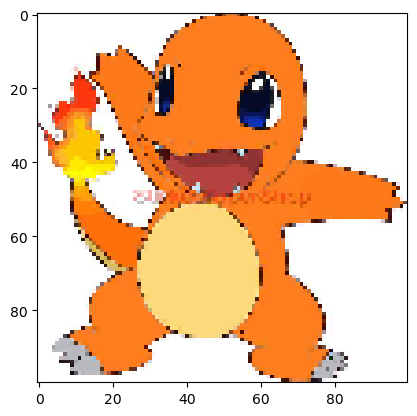

In [372]:
plt.imshow(img.astype('int'));

In [374]:
img = img.reshape(1, 30000)
img.shape

(1, 30000)

In [376]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


'Charmander'

# for any doubt mail at officialgaurav0408@gmail.com 